In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)


import re
import json
from matplotlib import cm

from collections import defaultdict

from matplotlib.ticker import FormatStrFormatter

cmap = cm.tab20

path = Path.cwd()/'logs'
path

PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs')

# create means and stds

In [2]:
def get_hp(f):
    with open(f, 'r') as file:
        data = json.load(file)
    
    hps = f.name.split('_')
    optim = hps[0]
#     if optim!=optimName:
#         return None
    lr = float(hps[1])
    batch_size = int(hps[2])
    seed = int(hps[3][:2])

    hpsDict = {'optimizer':optim,
           'lr':float(lr),
           'seed': seed,
            'bs' : batch_size,
#            'wd':float(comps[1]),
           'accs1':data['accs1'],
           'accs5':data['accs5'],
           'epochs':data['epochs'],
           'epoch_time':data['epoch_time']
          }

    return hpsDict

# class Optimized(object):
#     def __init__(self, path):
#         self.files = [f for f in path.iterdir()]
#         self.logs = 

        

In [3]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/adabelief_0.001_32_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/activeradam_0.001_8192_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/sgd_0.0001_512_43.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/activeadamagg_0.001_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/radam_0.001_64_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/activesgdagg_0.0001_64_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/sgd_0.0001_256_44.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/adamw_0.0001_2048_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/adamw_0.001_32_42.json'),
 PosixPath('/Users/davoodwadi/supp/CIFAR-10/minibatch invariane/logs/activebelief_0.001_512_42.json'),
 PosixPath

In [5]:
# opt = 'adabelief'
# logs = [get_hp(f, opt) for f in files if get_optimName(f)==opt]

logs = [get_hp(f) for f in files if get_hp(f)['lr']==0.0001] 
logs.sort(key=lambda i: (i['bs']))

len(logs)

70

In [6]:
# verify seeds
seeds=set()
for log in logs:
    seed = log['seed']
    seeds.add(seed)

print(seeds)

{42, 43, 44}


In [7]:
bss = sorted(list(set([get_hp(f)['bs'] for f in files if get_hp(f)['lr']==0.0001])), reverse=True)
bs2c=dict()
for bs in bss:
    index = bss.index(bs)
    if index>17:
        index-=18
    bs2c[bs]=cmap(index*2)
bs2c

{2048: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 1024: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 512: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 256: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 128: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 64: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 32: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)}

# 3runs

## 3 runs SGD

In [9]:
optim1 = 'sgd'
optim2 = 'activesgdaggg'

test_accs1=defaultdict(list)
test_accs2=defaultdict(list)
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    bs = log['bs']
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[bs].append(log['accs1'])
    else:
        test_accs2[bs].append(log['accs1'])

In [10]:
for bs in test_accs1.keys():
    test_accs1[bs] = np.array(test_accs1[bs])
#     mean1 = accs1.mean(0)
#     std1 = accs1.std(0)
for bs in test_accs2.keys():
    test_accs2[bs] = np.array(test_accs2[bs])
    print(test_accs2[bs].shape)
#     mean2 = accs2.mean(0)
#     print(mean2.shape)
#     std2 = accs2.std(0)

(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)
(3, 200)


sgd: 32; (3, 200)
sgd: 64; (3, 200)
sgd: 128; (3, 200)
sgd: 256; (3, 200)
sgd: 512; (3, 200)
sgd: 1024; (3, 200)
sgd: 2048; (3, 200)
activesgdaggg: 32; (3, 200)
activesgdaggg: 64; (3, 200)
activesgdaggg: 128; (3, 200)
activesgdaggg: 256; (3, 200)
activesgdaggg: 512; (3, 200)
activesgdaggg: 1024; (3, 200)
activesgdaggg: 2048; (3, 200)


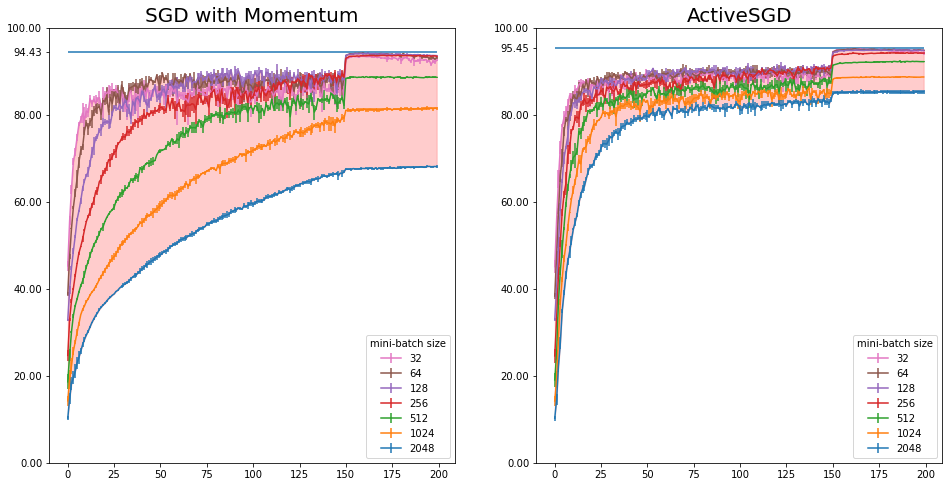

In [11]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .1

thresh = 2100

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for bs in test_accs1.keys():
    if bs>=thresh: continue
    optimizer = optim1
    print(f'{optimizer}: {bs}; {test_accs1[bs].shape}')
    avg = test_accs1[bs].mean(0)
    std = test_accs1[bs].std(0)
    if maxi1<test_accs1[bs].max():
        maxi1=test_accs1[bs].max()
        
    test_acc1.append(avg)
#     test_acc1.append(arr)
    axes[0].errorbar(range(200), avg, yerr=std, label=f"{bs}", c=bs2c[bs])
    
#     axes[0].plot(avg, label=f"{bs}", c=bs2c[bs])
#     axes[0].fill_between(range(200), avg-std, avg+std, color=bs2c[bs], alpha=alpha)

for bs in test_accs2.keys():
    if bs>=thresh: continue
    optimizer = optim2
    print(f'{optimizer}: {bs}; {test_accs2[bs].shape}')
    avg = test_accs2[bs].mean(0)
    std = test_accs2[bs].std(0)

    if maxi2<test_accs2[bs].max():
        maxi2=test_accs2[bs].max()
        
    test_acc2.append(avg)
#     test_acc2.append(arr)
    axes[1].errorbar(range(200), avg, yerr=std, label=f"{bs}", c=bs2c[bs])
    
#     axes[1].plot(avg, label=f"{bs}", c=bs2c[bs])
#     axes[1].fill_between(range(200), avg-std, avg+std, color=bs2c[bs], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

# axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='red', alpha=.2)
# axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

axes[0].fill_between(range(0,200), min1[0:], max1[0:], color='red', alpha=.2)
axes[1].fill_between(range(0,200), min2[0:], max2[0:], color='red', alpha=0.2)

# axes[0].set_xlim(149,200)
# axes[1].set_xlim(149,200)
# axes[0].set_ylim(92,96)
# axes[1].set_ylim(92,96)

# axes[0].set_ylim(40)
# axes[1].set_ylim(40)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

axes[0].set_title('SGD with Momentum')
axes[1].set_title('ActiveSGD')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
axes[0].get_legend().set_title("mini-batch size")
axes[1].get_legend().set_title("mini-batch size")

In [12]:
fig.savefig('./cifar10batchsize.png', dpi=300, bbox_inches='tight')

## AdamW

adamw: 32; (200,)
adamw: 64; (200,)
adamw: 128; (200,)
adamw: 256; (200,)
adamw: 512; (200,)
adamw: 1024; (200,)
activeadamagg: 32; (200,)
activeadamagg: 64; (200,)
activeadamagg: 128; (200,)
activeadamagg: 256; (200,)
activeadamagg: 512; (200,)
activeadamagg: 1024; (200,)


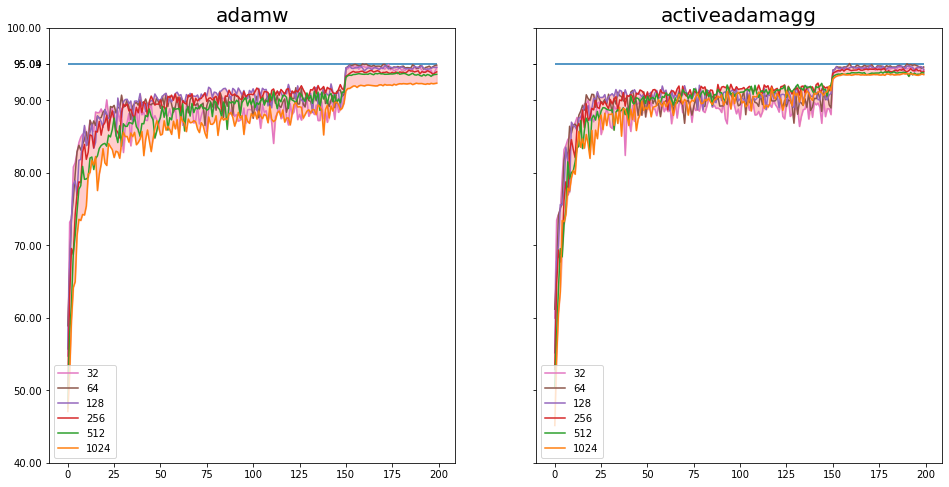

In [20]:
optim1 = 'adamw'
optim2 = 'activeadamagg'


test_accs1=dict()
test_accs2=dict()
for log in logs:
    optimizer = log['optimizer']
    if optimizer!=optim1 and optimizer!=optim2 : continue
    bs = log['bs']
#     if bs==32: continue
    seed = log['seed']
#     if lr<1e-6: continue
    if optimizer==optim1:
        test_accs1[bs] = (log['accs1'])
    else:
        test_accs2[bs] = (log['accs1'])

fig, axes = plt.subplots(1,2, figsize=(16,8),sharey=True)
# linesty = {optim1: '-', optim2: 'dotted'}
alpha = .1

thresh = 2000

test_acc1=[]
test_acc2=[]
maxi1=maxi2=0
for bs in test_accs1.keys():
    if bs>=thresh: continue
    optimizer = optim1
    arr = np.array(test_accs1[bs])
    print(f'{optimizer}: {bs}; {arr.shape}')
#     avg = arr.mean(0)
#     std = arr.std(0)
    if maxi1<arr.max():
        maxi1=arr.max()
        
#     test_acc1.append(avg)
    test_acc1.append(arr)
    axes[0].plot(arr, label=f"{bs}", c=bs2c[bs])
    
#     axes[0].plot(avg, label=f"{bs}", c=bs2c[bs])
#     axes[0].fill_between(range(200), avg-std, avg+std, color=bs2c[bs], alpha=alpha)

for bs in test_accs2.keys():
    if bs>=thresh: continue
    optimizer = optim2
    arr = np.array(test_accs2[bs])
    print(f'{optimizer}: {bs}; {arr.shape}')
#     avg = arr.mean(0)
#     std = arr.std(0)

    if maxi2<arr.max():
        maxi2=arr.max()
        
#     test_acc2.append(avg)
    test_acc2.append(arr)
    axes[1].plot(arr, label=f"{bs}", c=bs2c[bs])
    
#     axes[1].plot(avg, label=f"{bs}", c=bs2c[bs])
#     axes[1].fill_between(range(200), avg-std, avg+std, color=bs2c[bs], alpha=alpha)

#         axes[0].plot(train_acc, label=f"{lr}", c=lr2c[lr], linestyle=linestyle)
    #         axes[0].set_ylim(70.5,100)
#     axes.set_xlim(149,200)
test_acc1 = np.array(test_acc1)
test_acc2 = np.array(test_acc2)
max1 = test_acc1.max(0)
max2 = test_acc2.max(0)
min1 = test_acc1.min(0)
min2 = test_acc2.min(0)

# axes[0].fill_between(range(149,200), min1[149:], max1[149:], color='red', alpha=.2)
# axes[1].fill_between(range(149,200), min2[149:], max2[149:], color='red', alpha=0.2)

axes[0].fill_between(range(0,200), min1[0:], max1[0:], color='red', alpha=.2)
axes[1].fill_between(range(0,200), min2[0:], max2[0:], color='red', alpha=0.2)

# axes[0].set_xlim(149,200)
# axes[1].set_xlim(149,200)
# axes[0].set_ylim(88,96)
# axes[1].set_ylim(88,96)

# axes[0].set_ylim(40)
# axes[1].set_ylim(40)

axes[0].hlines(maxi1, 0, 199)
# axes[0].hlines(min1, 0, 199)
yticks0 = axes[0].get_yticks()
yt0 = list(yticks0)
yt0.append(maxi1)
axes[0].set_yticks(yt0)

axes[1].hlines(maxi2, 0, 199)
# axes[1].hlines(min2, 0, 199)
yticks1 = axes[1].get_yticks()
yt1 = list(yticks1)
yt1.append(maxi2)
axes[1].set_yticks(yt1)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

axes[0].set_title(optim1)
axes[1].set_title(optim2)
axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [21]:
fig.savefig('./cifar10batchsizeadamw.png', dpi=300, bbox_inches='tight')